# Introduction

First we import all the libraries and functions needed for the code to run

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.optimize import curve_fit
from IPython.display import display, Math

Import the data files' path

In [3]:
# # Definition of the path to take the data # #

# write here the path to the folder with the data
path = "Data/"

Now we define the decreasing exponential as the function to fit our data and the vector of Q and T values

In [6]:
# # Definition of the function to fit # #
def f(x,a,b):
    aux = a*np.exp(-x/b)
    return aux

# # Definition of the function to add incertity depending on the scale of the aparata # #
def error(value):
    if value < 1000 and value >= 100:
      aux = 0.001
    if value < 100 and value >= 10:
      aux = 0.0001
    if value < 10 and value >= 1:
      aux = 0.00001
    if value < 1 and value >= 0.1:
      aux = 0.000001
    return aux/m.sqrt(12)

# Total number of data # (Nedded to fill the 'global' Q and T vectors)
N = 4
# # Definition of global arrays of Q and T # #
Q = np.zeros(N)
errQ = np.zeros(N)
T = np.zeros(N)
errT = np.zeros(N)

# Data 1, 2, 3 & 4
Data taken on the first laboratory session

## Data 1

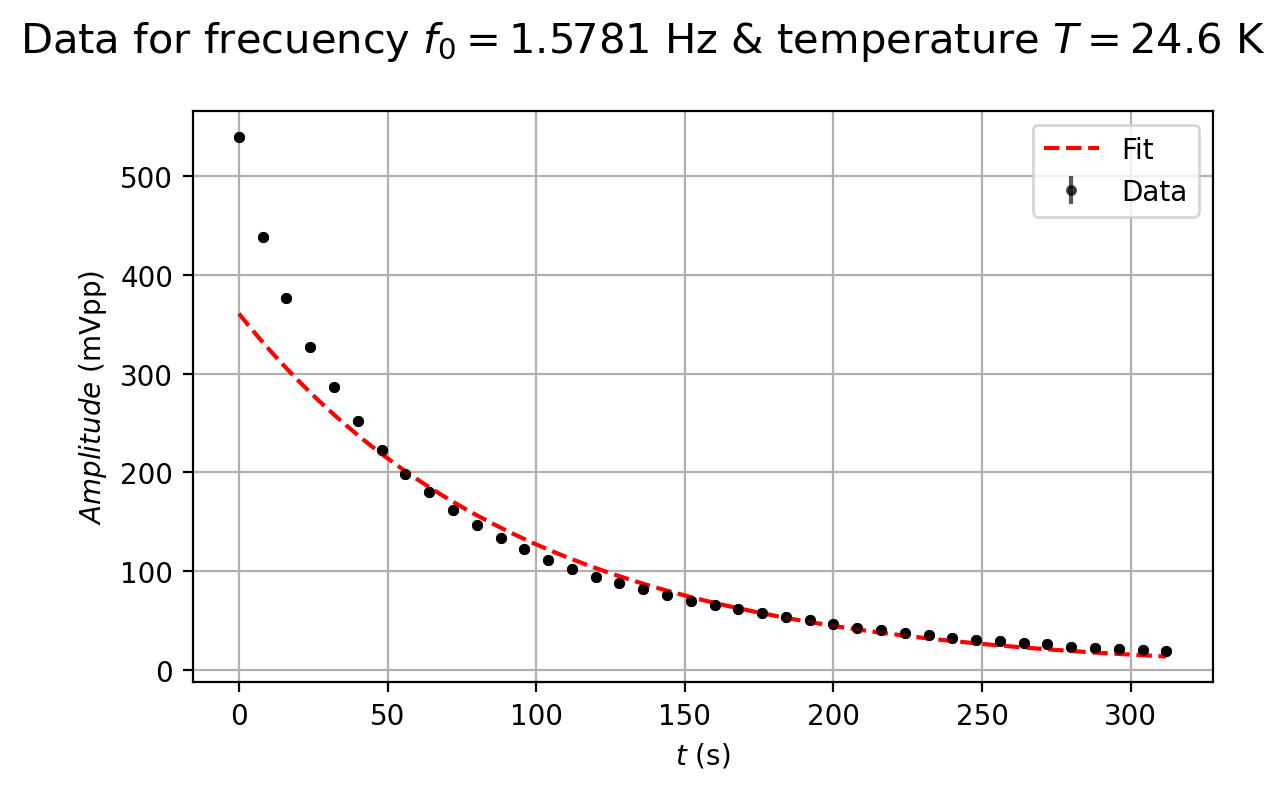


For a fit of the type


<IPython.core.display.Math object>

we got:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


This gives us a Q value of:


<IPython.core.display.Math object>


For a frecuency of:


<IPython.core.display.Math object>


For a Temperature of:


<IPython.core.display.Math object>

In [7]:
# # Import the values of the data, time,amplitude in voltage and temperature from file # #
v = np.loadtxt( path+"data1.txt" , unpack = True , delimiter = "\t",usecols = (0))
v_error = [error(val) for val in v]

# # Time interval # #
dt = 8
t = np.arange(0,dt*len(v),dt)

# # Frecuency and temperature of work
T_ini = 24
T_fin = 25.2
T_value = np.mean( [T_ini,T_fin])
errT_value = np.std([T_ini,T_fin])/m.sqrt(2)

f_0 = 1.5781
errf_0 = 0

# # Declare units for the data # #
t_unit = "s"
v_unit = "mVpp"
T_unit = "K"
f_unit = "Hz"

# # Fit of the data # #
resval,rescov = curve_fit( f, t, v, [200,10],sigma = v_error)
reserr = np.sqrt(np.diag(rescov))
R2 = 1 - (np.sum( ( v - f( t, *resval) )**2 ) / np.sum( ( v - np.mean(v) )**2 ))


# # Plot of the data with fit # #

#sampling time
h = max([abs((max(t)-min(t))/1000),1])
fit_time = np.arange(min(t), max(t)+h, h)
fit_amplitude = resval[0]*np.exp(-fit_time/resval[1])

fig = plt.figure(figsize=(6,4), dpi=100);
fig.suptitle(r"Data for frecuency $f_0 = {0}$ {1} & temperature $T = {2:.1f}$ {3}".format(f_0, f_unit, T_value, T_unit), size = 15)
#(Data and fit plot)
plt.grid()
plt.xlabel(r"$t$ ({0})".format(t_unit), size = 10)
plt.ylabel(r"$Amplitude$ ({0})".format(v_unit), size = 10)
plt.plot(t,v,'.',c='k', ms=6)
plt.errorbar(t, v, yerr=v_error, fmt=".k", capsize=0,alpha = 0.65,label="Data")
plt.plot(fit_time,fit_amplitude,'--',c='red',label="Fit")
plt.legend()
#to make it look good
%config InlineBackend.figure_format='retina'
plt.tight_layout()
plt.show()

# # Calculus of the Q-value # #
Q_value = f_0*resval[1]*m.pi
Q_error = Q_value*m.sqrt( (reserr[1]/resval[1])**2 + (errf_0/f_0)**2 )

# # Display results # #
print("\nFor a fit of the type")
display(Math("y = a·\exp(-x/b)"))
print("we got:")
display(Math("a = {0:.1f} \pm {1:.1f}".format(resval[0],reserr[0])))
display(Math("b = {0:.0f} \pm {1:.0f}".format(resval[1],reserr[1])))
display(Math("R^2= {0:.5f}".format(R2)))
print("\nThis gives us a Q value of:")
display(Math("Q = {0:.0f} \pm {1:.0f}".format(Q_value,Q_error)))
print("\nFor a frecuency of:")
display(Math("f_0 = {0}\pm{1} ~\mathrm{{{2}}}".format(f_0,errf_0,f_unit)))
print("\nFor a Temperature of:")
display(Math("T={0:.2f}\pm{1:.2f} ~\mathrm{{{2}}}".format(T_value,errT_value,T_unit)))

# # Store the value of Q and T # #
i = 0
Q[i] = Q_value
errQ[i] = Q_error
T[i] = T_value
errT[i] = errT_value

## Data 2

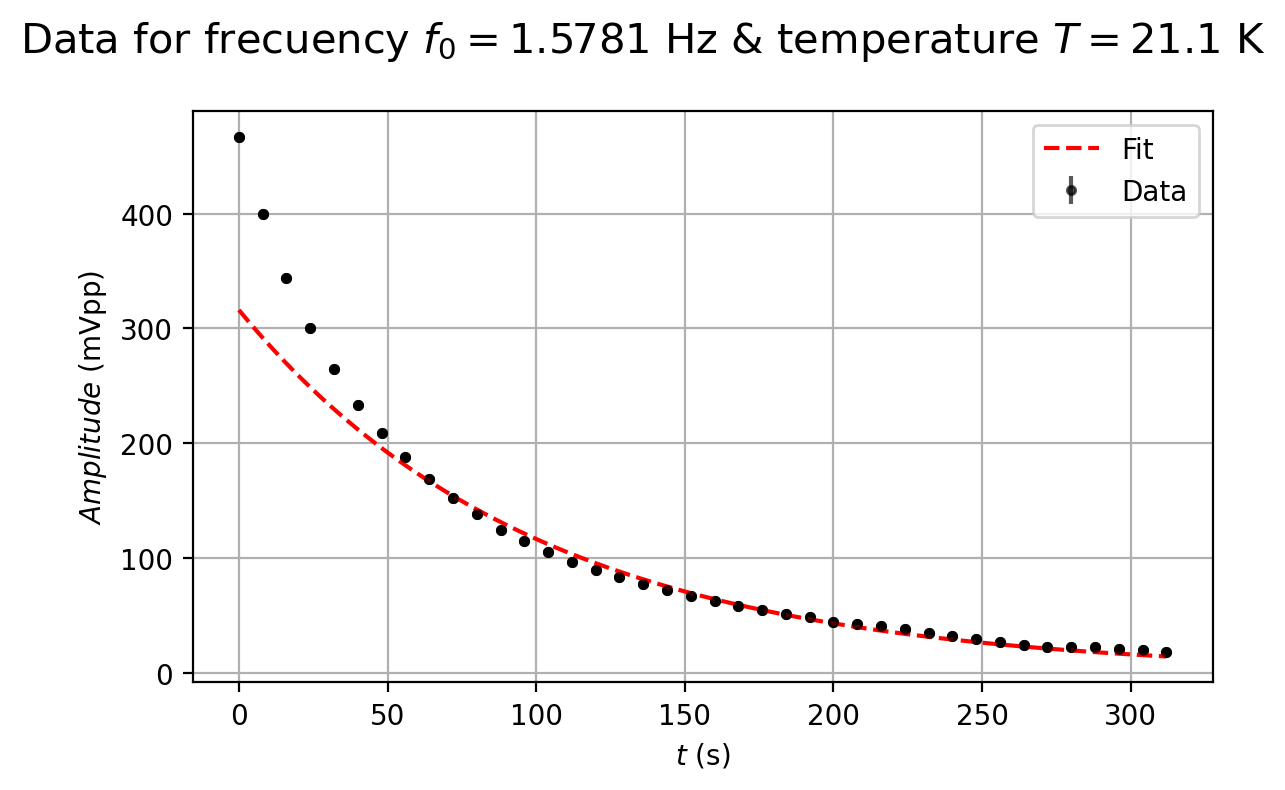


For a fit of the type


<IPython.core.display.Math object>

we got:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


This gives us a Q value of:


<IPython.core.display.Math object>


For a frecuency of:


<IPython.core.display.Math object>


For a Temperature of:


<IPython.core.display.Math object>

In [8]:
# # Import the values of the data, time,amplitude in voltage and temperature from file # #
v= np.loadtxt( path+"data2.txt" , unpack = True , delimiter = "\t",usecols = (0))
v_error = [error(val) for val in v]

# # Time interval # #
dt = 8
t = np.arange(0,dt*len(v),dt)

# # Frecuency and temperature of work
T_ini = 21.56
T_fin = 20.717
T_value = np.mean( [T_ini,T_fin])
errT_value = np.std([T_ini,T_fin])/m.sqrt(2)

f_0 = 1.5781
errf_0 = 0

# # Declare units for the data # #
t_unit = "s"
v_unit = "mVpp"
T_unit = "K"
f_unit = "Hz"

# # Fit of the data # #
resval,rescov = curve_fit( f, t, v, [200,10],sigma = v_error)
reserr = np.sqrt(np.diag(rescov))
R2 = 1 - (np.sum( ( v - f( t, *resval) )**2 ) / np.sum( ( v - np.mean(v) )**2 ))


# # Plot of the data with fit # #

#sampling time
h = max([abs((max(t)-min(t))/1000),1])
fit_time = np.arange(min(t), max(t)+h, h)
fit_amplitude = resval[0]*np.exp(-fit_time/resval[1])

fig = plt.figure(figsize=(6,4), dpi=100);
fig.suptitle(r"Data for frecuency $f_0 = {0}$ {1} & temperature $T = {2:.1f}$ {3}".format(f_0, f_unit, T_value, T_unit), size = 15)
#(Data and fit plot)
plt.grid()
plt.xlabel(r"$t$ ({0})".format(t_unit), size = 10)
plt.ylabel(r"$Amplitude$ ({0})".format(v_unit), size = 10)
plt.plot(t,v,'.',c='k', ms=6)
plt.errorbar(t, v, yerr=v_error, fmt=".k", capsize=0,alpha = 0.65,label="Data")
plt.plot(fit_time,fit_amplitude,'--',c='red',label="Fit")
plt.legend()
#to make it look good
%config InlineBackend.figure_format='retina'
plt.tight_layout()
plt.show()

# # Calculus of the Q-value # #
Q_value = f_0*resval[1]*m.pi
Q_error = Q_value*m.sqrt( (reserr[1]/resval[1])**2 + (errf_0/f_0)**2 )

# # Display results # #
print("\nFor a fit of the type")
display(Math("y = a·\exp(-x/b)"))
print("we got:")
display(Math("a = {0:.1f} \pm {1:.1f}".format(resval[0],reserr[0])))
display(Math("b = {0:.0f} \pm {1:.0f}".format(resval[1],reserr[1])))
display(Math("R^2= {0:.5f}".format(R2)))
print("\nThis gives us a Q value of:")
display(Math("Q = {0:.0f} \pm {1:.0f}".format(Q_value,Q_error)))
print("\nFor a frecuency of:")
display(Math("f_0 = {0}\pm{1} ~\mathrm{{{2}}}".format(f_0,errf_0,f_unit)))
print("\nFor a Temperature of:")
display(Math("T={0:.2f}\pm{1:.2f} ~\mathrm{{{2}}}".format(T_value,errT_value,T_unit)))

# # Store the value of Q and T # #
i = 1
Q[i] = Q_value
errQ[i] = Q_error
T[i] = T_value
errT[i] = errT_value

## Data 3

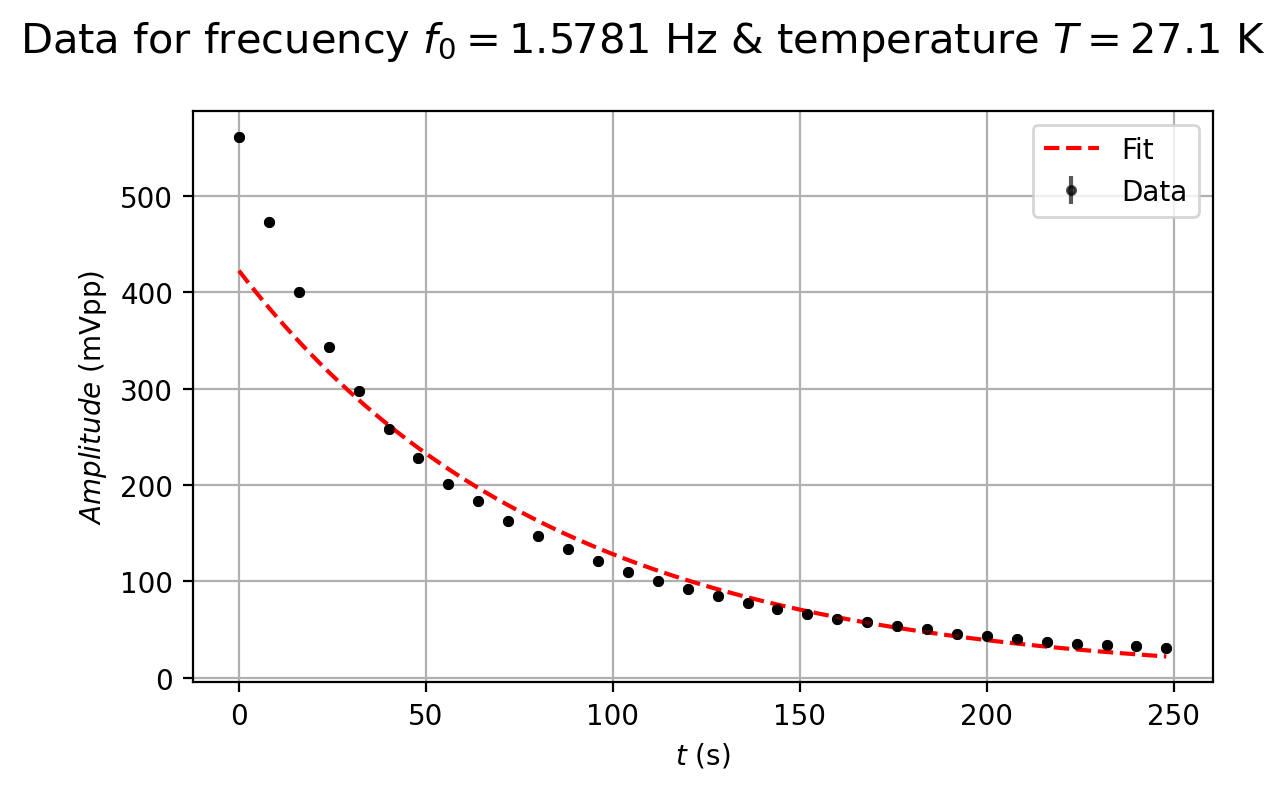


For a fit of the type


<IPython.core.display.Math object>

we got:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


This gives us a Q value of:


<IPython.core.display.Math object>


For a frecuency of:


<IPython.core.display.Math object>


For a Temperature of:


<IPython.core.display.Math object>

In [9]:
# # Import the values of the data, time,amplitude in voltage and temperature from file # #
v= np.loadtxt( path+"data3.txt" , unpack = True , delimiter = "\t",usecols = (0))
v_error = [error(val) for val in v]

# # Time interval # #
dt = 8
t = np.arange(0,dt*len(v),dt)

# # Frecuency and temperature of work
T_ini = 26.8
T_fin = 27.5
T_value = np.mean( [T_ini,T_fin])
errT_value = np.std([T_ini,T_fin])/m.sqrt(2)

f_0 = 1.5781
errf_0 = 0

# # Declare units for the data # #
t_unit = "s"
v_unit = "mVpp"
T_unit = "K"
f_unit = "Hz"

# # Fit of the data # #
resval,rescov = curve_fit( f, t, v, [200,10],sigma = v_error)
reserr = np.sqrt(np.diag(rescov))
R2 = 1 - (np.sum( ( v - f( t, *resval) )**2 ) / np.sum( ( v - np.mean(v) )**2 ))


# # Plot of the data with fit # #

#sampling time
h = max([abs((max(t)-min(t))/1000),1])
fit_time = np.arange(min(t), max(t)+h, h)
fit_amplitude = resval[0]*np.exp(-fit_time/resval[1])

fig = plt.figure(figsize=(6,4), dpi=100);
fig.suptitle(r"Data for frecuency $f_0 = {0}$ {1} & temperature $T = {2:.1f}$ {3}".format(f_0, f_unit, T_value, T_unit), size = 15)
#(Data and fit plot)
plt.grid()
plt.xlabel(r"$t$ ({0})".format(t_unit), size = 10)
plt.ylabel(r"$Amplitude$ ({0})".format(v_unit), size = 10)
plt.plot(t,v,'.',c='k', ms=6)
plt.errorbar(t, v, yerr=v_error, fmt=".k", capsize=0,alpha = 0.65,label="Data")
plt.plot(fit_time,fit_amplitude,'--',c='red',label="Fit")
plt.legend()
#to make it look good
%config InlineBackend.figure_format='retina'
plt.tight_layout()
plt.show()

# # Calculus of the Q-value # #
Q_value = f_0*resval[1]*m.pi
Q_error = Q_value*m.sqrt( (reserr[1]/resval[1])**2 + (errf_0/f_0)**2 )

# # Display results # #
print("\nFor a fit of the type")
display(Math("y = a·\exp(-x/b)"))
print("we got:")
display(Math("a = {0:.1f} \pm {1:.1f}".format(resval[0],reserr[0])))
display(Math("b = {0:.0f} \pm {1:.0f}".format(resval[1],reserr[1])))
display(Math("R^2= {0:.5f}".format(R2)))
print("\nThis gives us a Q value of:")
display(Math("Q = {0:.0f} \pm {1:.0f}".format(Q_value,Q_error)))
print("\nFor a frecuency of:")
display(Math("f_0 = {0}\pm{1} ~\mathrm{{{2}}}".format(f_0,errf_0,f_unit)))
print("\nFor a Temperature of:")
display(Math("T={0:.2f}\pm{1:.2f} ~\mathrm{{{2}}}".format(T_value,errT_value,T_unit)))

# # Store the value of Q and T # #
i = 2
Q[i] = Q_value
errQ[i] = Q_error
T[i] = T_value
errT[i] = errT_value

## Data 4

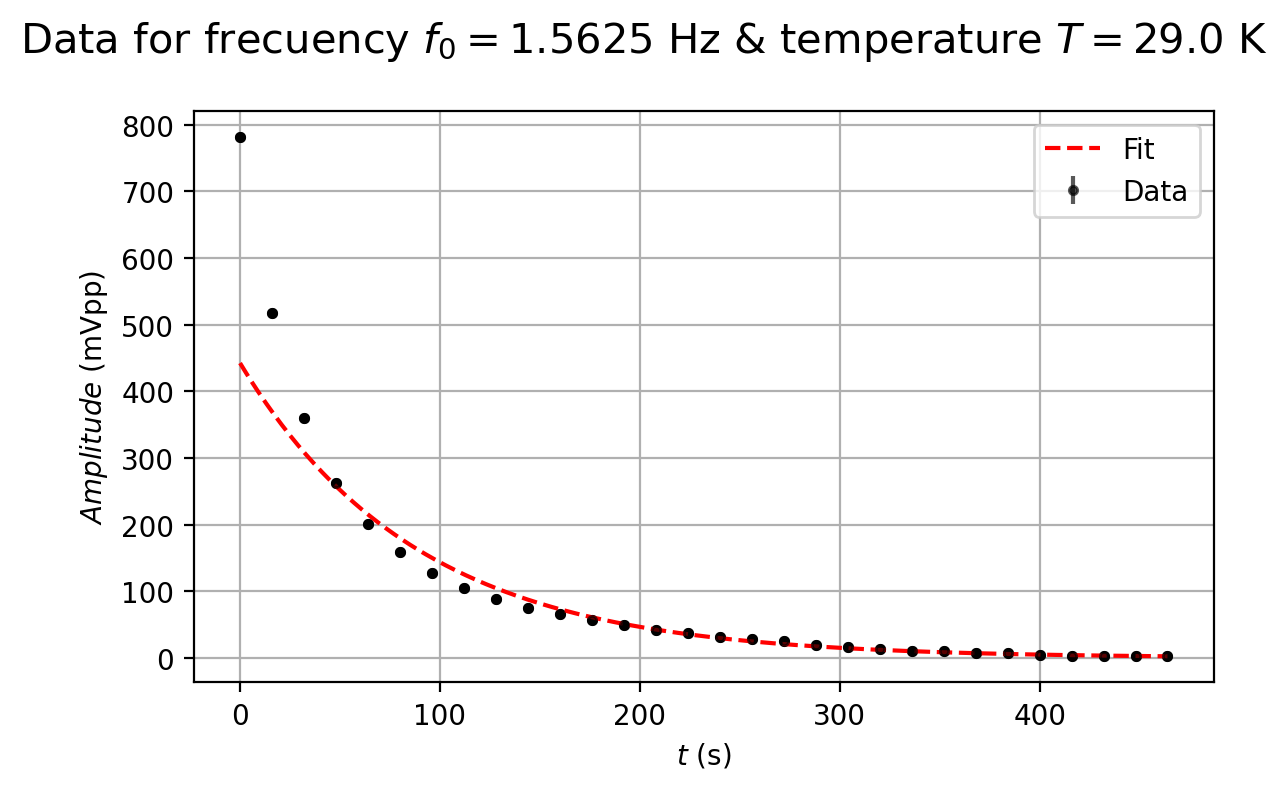


For a fit of the type


<IPython.core.display.Math object>

we got:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


This gives us a Q value of:


<IPython.core.display.Math object>


For a frecuency of:


<IPython.core.display.Math object>


For a Temperature of:


<IPython.core.display.Math object>

In [10]:
# # Import the values of the data, time,amplitude in voltage and temperature from file # #
v = np.loadtxt( path+"data4.txt" , unpack = True , delimiter = "\t",usecols = (0))
v_error = [error(val) for val in v]

# # Time interval # #
dt = 16
t = np.arange(0,dt*len(v),dt)

# # Frecuency and temperature of work
T_ini = 28.263
T_fin = 29.76
T_value = np.mean( [T_ini,T_fin])
errT_value = np.std([T_ini,T_fin])/m.sqrt(2)

f_0 = 1.5625
errf_0 = 0

# # Declare units for the data # #
t_unit = "s"
v_unit = "mVpp"
T_unit = "K"
f_unit = "Hz"

# # Fit of the data # #
resval,rescov = curve_fit( f, t, v, [200,10],sigma = v_error)
reserr = np.sqrt(np.diag(rescov))
R2 = 1 - (np.sum( ( v - f( t, *resval) )**2 ) / np.sum( ( v - np.mean(v) )**2 ))


# # Plot of the data with fit # #

#sampling time
h = max([abs((max(t)-min(t))/1000),1])
fit_time = np.arange(min(t), max(t)+h, h)
fit_amplitude = resval[0]*np.exp(-fit_time/resval[1])

fig = plt.figure(figsize=(6,4), dpi=100);
fig.suptitle(r"Data for frecuency $f_0 = {0}$ {1} & temperature $T = {2:.1f}$ {3}".format(f_0, f_unit, T_value, T_unit), size = 15)
#(Data and fit plot)
plt.grid()
plt.xlabel(r"$t$ ({0})".format(t_unit), size = 10)
plt.ylabel(r"$Amplitude$ ({0})".format(v_unit), size = 10)
plt.plot(t,v,'.',c='k', ms=6)
plt.errorbar(t, v, yerr=v_error, fmt=".k", capsize=0,alpha = 0.65,label="Data")
plt.plot(fit_time,fit_amplitude,'--',c='red',label="Fit")
plt.legend()
#to make it look good
%config InlineBackend.figure_format='retina'
plt.tight_layout()
plt.show()

# # Calculus of the Q-value # #
Q_value = f_0*resval[1]*m.pi
Q_error = Q_value*m.sqrt( (reserr[1]/resval[1])**2 + (errf_0/f_0)**2 )

# # Display results # #
print("\nFor a fit of the type")
display(Math("y = a·\exp(-x/b)"))
print("we got:")
display(Math("a = {0:.1f} \pm {1:.1f}".format(resval[0],reserr[0])))
display(Math("b = {0:.0f} \pm {1:.0f}".format(resval[1],reserr[1])))
display(Math("R^2= {0:.5f}".format(R2)))
print("\nThis gives us a Q value of:")
display(Math("Q = {0:.0f} \pm {1:.0f}".format(Q_value,Q_error)))
print("\nFor a frecuency of:")
display(Math("f_0 = {0}\pm{1} ~\mathrm{{{2}}}".format(f_0,errf_0,f_unit)))
print("\nFor a Temperature of:")
display(Math("T={0:.2f}\pm{1:.2f} ~\mathrm{{{2}}}".format(T_value,errT_value,T_unit)))

# # Store the value of Q and T # #
i = 3
Q[i] = Q_value
errQ[i] = Q_error
T[i] = T_value
errT[i] = errT_value

# Q value Vs. Temperature

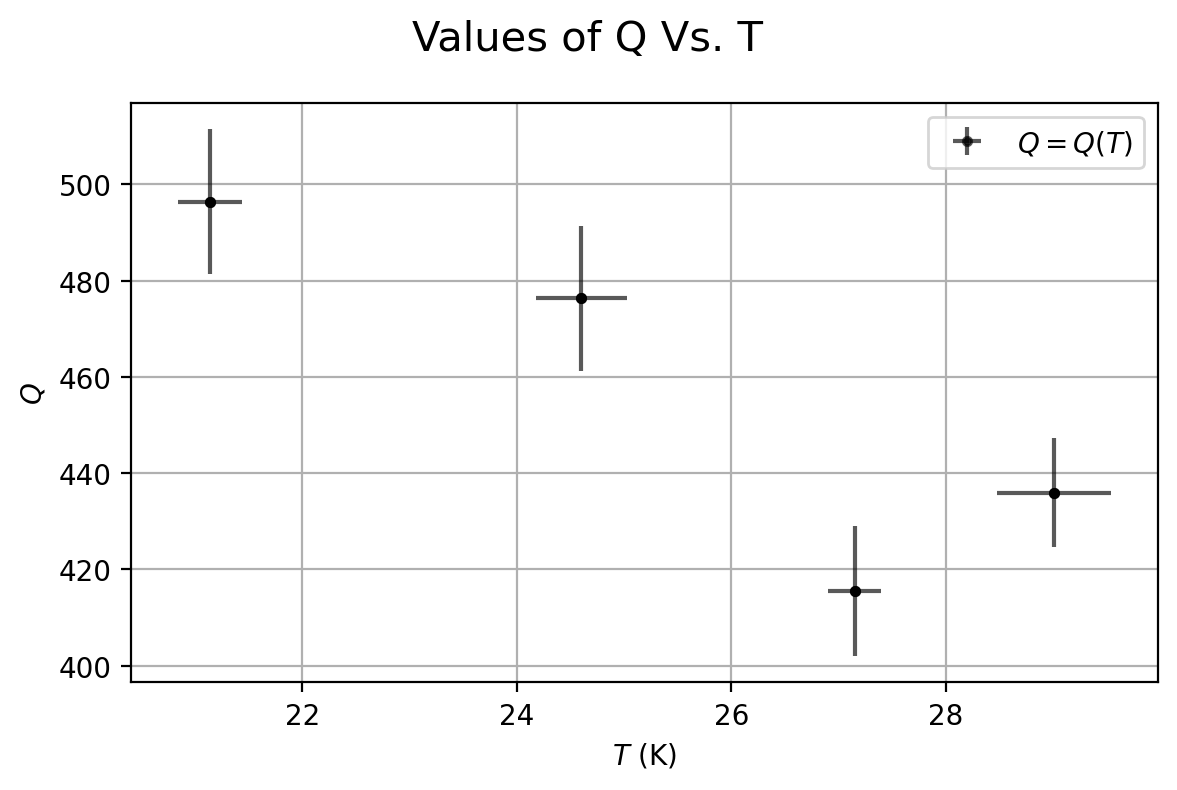

In [11]:
fig = plt.figure(figsize=(6,4), dpi=100);
fig.suptitle(r"Values of Q Vs. T", size = 15)
#(Data and fit plot)
plt.grid()
plt.xlabel(r"$T$ ({0})".format(T_unit), size = 10)
plt.ylabel(r"$Q$", size = 10)
plt.plot(T,Q,'.',c='k', ms=6)
plt.errorbar(T, Q, yerr=errQ,xerr=errT, fmt=".k", capsize=0,alpha = 0.65,label="$Q=Q(T)$")
plt.legend()
#to make it look good
%config InlineBackend.figure_format='retina'
plt.tight_layout()
plt.show()